## HW7

### Task 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline, PchipInterpolator
%matplotlib inline

In [2]:
#загрузим файл и извлечём два вектора с координатами
data = np.load('data.npz')
x1 = data['x1']
y1 = data['y1']

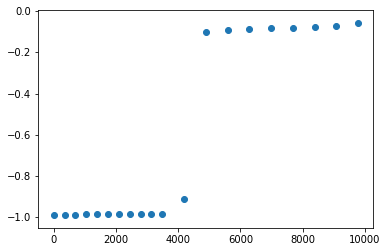

In [3]:
#посмотрим на заданную функцию
plt.scatter(x1, y1)

In [4]:
#похоже на смещённую функцию Хевисайда

In [5]:
#интерполяционный Лагранжев многочлен

In [6]:
#рассчитываем один полином
def lagrange(x, x1, k):
    n = len(x1)
    num = 1.0
    den = 1.0
    for j in range(n):
        if j == k:
            continue
        den *= x1[k] - x1[j]
        num *= x - x1[j]
    return num/den

In [7]:
lagrange(x1[0], x1, 1)

0.0

In [8]:
#теперь все 
def interp(x, x1, y1):
    return sum([lagrange(x, x1, i) * y1[i] for i in range(len(x1))])

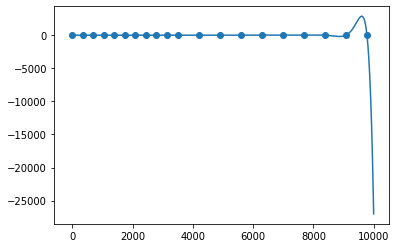

In [9]:
#посмтроим функцию
xs = np.linspace(0, 10000, 1000)
ys = [interp(k, x1, y1) for k in xs]
plt.plot(xs, ys)
plt.scatter(x1, y1)

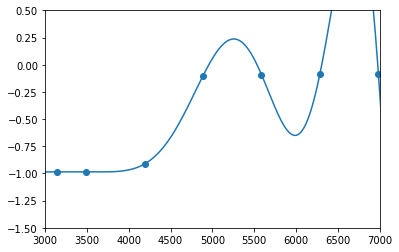

In [10]:
#как видим, наша подгонка под конец сильно убывает, да так, что из-за масштаба верхняя и нижняя линии исходной функции
#слились в одну
#рассмотрим отдельно место излома
plt.xlim(3000, 7000)
plt.ylim(-1.5, 0.5)
plt.plot(xs, ys)
plt.scatter(x1, y1)

In [11]:
#попробуем другие способы

In [12]:
#Кубический сплайн

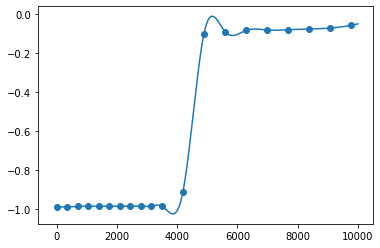

In [13]:
cubic = CubicSpline(x1, y1)
plt.plot(xs, cubic(xs))
plt.scatter(x1, y1)

In [14]:
#Монотонный кубический интерполянт

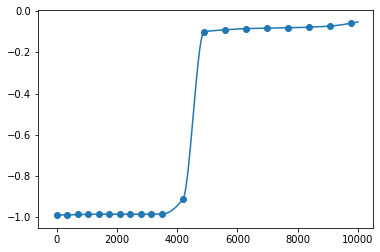

In [15]:
cubic = PchipInterpolator(x1, y1)
plt.plot(xs, cubic(xs))
plt.scatter(x1, y1)

### Task 2

In [16]:
#polyfit
def plotpolyfit(n):
    x = np.linspace(-1, 1, n)
    y = np.cos(n * x)
    plt.scatter(x, y)
    z = np.polyfit(x, y, n)
    ypol = np.poly1d(z)
    xs = np.linspace(-1, 1, 1000)
    plt.plot(xs, ypol(xs))

c:\users\alyva\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: RankWarning: Polyfit may be poorly conditioned
  


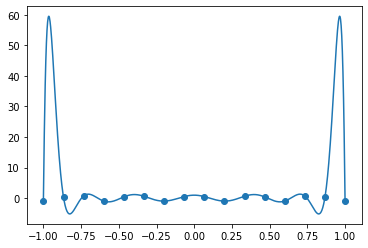

In [17]:
n = 16
plotpolyfit(n)


c:\users\alyva\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: RankWarning: Polyfit may be poorly conditioned
  


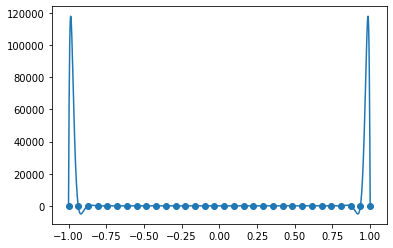

In [18]:
n = 32
plotpolyfit(n)

c:\users\alyva\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: RankWarning: Polyfit may be poorly conditioned
  


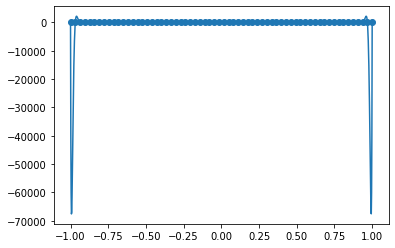

In [19]:
n = 64
plotpolyfit(n)

In [20]:
#lagrange
#пока не построил